### Consumo API

Após seguir os passos indicados no slide determine a url fornecida pela ferramenta do governo:

In [ ]:
import requests
import json
import pandas as pd
import sqlite3
import os

# Diretório onde o arquivo será salvo
directory = "datasets"

# Verifica se o diretório já existe, caso contrário, cria o diretório
if not os.path.exists(directory):
    os.makedirs(directory)

class etBcb:
    def __init__(self, api_link):
        self.api_link = api_link
        self.dados = None
        self.df = None

    def requisicao_api(self):
        """Método GET para a API e armazenar a resposta."""
        try:
            resposta = requests.get(self.api_link)
            if resposta.status_code == 200:
                self.dados = resposta.json()
                print('Status Code:', resposta.status_code)
            else:
                print('Erro na requisição. Status Code:', resposta.status_code)
        except Exception as e:
            print('Erro ao fazer a requisição:', e)

    def transformar_dados(self, chave_json):
        """Método para transformar os dados JSON em um DataFrame pandas."""
        if self.dados:
            try:
                data = self.dados[chave_json]
                self.df = pd.json_normalize(data)
                print('Transformação concluída.')
            except KeyError:
                print(f'Chave "{chave_json}" não encontrada nos dados JSON.')
            except Exception as e:
                print('Erro ao transformar os dados:', e)
        else:
            print('Nenhum dado para transformar.')

    def salvar_sqlite(self, nome_tabela):
        """Método para salvar o DataFrame transformado em um banco de dados SQLite."""
        nome_banco = 'Fecomdb.db'
        if self.df is not None:
            try:
                conexao = sqlite3.connect(nome_banco)
                self.df.to_sql(nome_tabela, conexao, if_exists='replace', index=False)
                conexao.close()
                print(f'Dados salvos na tabela "{nome_tabela}" do banco de dados "{nome_banco}".')
            except Exception as e:
                print('Erro ao salvar os dados no banco de dados SQLite:', e)
        else:
            print('Nenhum dado para salvar no banco de dados.')

    def salvar_json(self, nome_arquivo):
        """Método para salvar os dados extraídos em um arquivo JSON."""
        if self.dados is not None:
            try:
                with open(f'datasets/{nome_arquivo}', 'w') as f:
                    json.dump(self.dados, f)
                print(f'Dados salvos no arquivo JSON: {nome_arquivo}')
            except Exception as e:
                print('Erro ao salvar o JSON:', e)
        else:
            print('Nenhum dado no JSON.')

    def salvar_csv(self, nome_arquivo):
        """Método para salvar o DataFrame em um arquivo CSV."""
        if self.df is not None:
            try:
                self.df.to_csv(f'datasets/{nome_arquivo}', sep=';', encoding='utf-8-sig')
                print(f'Dados salvos no arquivo CSV: {nome_arquivo}')
            except Exception as e:
                print('Erro ao salvar o CSV:', e)
        else:
            print('Nenhum dado no CSV.')

### Criando a tabela



In [ ]:
#Estatisticas de meios de pagamentos Trimestrais


url = "https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/MeiosdePagamentosTrimestralDA(trimestre=@trimestre)?@trimestre='20201'&$top=10000&$format=json&$select=datatrimestre,valorPix,valorTED,valorTEC,valorCheque,valorBoleto,valorDOC,valorCartaoCredito,valorCartaoDebito,valorCartaoPrePago,valorTransIntrabancaria,valorConvenios,valorDebitoDireto,valorSaques,quantidadePix,quantidadeTED,quantidadeTEC,quantidadeCheque,quantidadeBoleto,quantidadeDOC,quantidadeCartaoCredito,quantidadeCartaoDebito,quantidadeCartaoPrePago,quantidadeTransIntrabancaria,quantidadeConvenios,quantidadeDebitoDireto,quantidadeSaques"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('EstatisticaDeMeiosDePagamentosTRIMES')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('PagamentosTrimes.csv')

Status Code: 200
Transformação concluída.
Dados salvos na tabela "EstatisticaDeMeiosDePagamentosTRIMES" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: PagamentosTrimes.csv


In [ ]:
#Estatisticas de meios de pagamentos Mensais


url = "https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/MeiosdePagamentosMensalDA(AnoMes=@AnoMes)?@AnoMes='202001'&$top=10000&$format=json&$select=AnoMes,quantidadePix,valorPix,quantidadeTED,valorTED,quantidadeTEC,valorTEC,quantidadeCheque,valorCheque,quantidadeBoleto,valorBoleto,quantidadeDOC,valorDOC"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('EstatisticaDeMeiosDePagamentosMES')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('meios_de_pagamentos_mensais.csv')

Status Code: 200
Transformação concluída.
Dados salvos na tabela "EstatisticaDeMeiosDePagamentosMES" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: meios_de_pagamentos_mensais.csv


In [ ]:
#Estoque e transações de cartões


url = "https://olinda.bcb.gov.br/olinda/servico/MPV_DadosAbertos/versao/v1/odata/Quantidadeetransacoesdecartoes(trimestre=@trimestre)?@trimestre='20201'&$top=10000&$format=json&$select=trimestre,nomeBandeira,nomeFuncao,produto,qtdCartoesEmitidos,qtdCartoesAtivos,qtdTransacoesNacionais,valorTransacoesNacionais,qtdTransacoesInternacionais,valorTransacoesInternacionais"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('TransacoesCartoes')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('transacoes_cartoes.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "TransacoesCartoes" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: transacoes_cartoes.csv


In [ ]:
df = pd.read_csv('datasets/transacoes_cartoes.csv', sep=';')

# Função para converter o formato de trimestre para data
def trimestre_para_data(trimestre):
    ano = int(str(trimestre)[:4])
    trimestre_num = int(str(trimestre)[-1])
    # Ajustando o mês para o início de cada trimestre
    mes = (trimestre_num - 1) * 3 + 1
    return pd.to_datetime(str(ano) + '-' + str(mes) + '-01')

# Aplicando a função ao DataFrame
df['trimestre'] = df['trimestre'].apply(trimestre_para_data)
df.to_csv('datasets/Cartoes2.csv', sep=';', decimal=',')

In [ ]:
#Expectativa de mercado mensais


url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativaMercadoMensais?$top=100000&$format=json&$select=Indicador,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoMensais')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_mensais.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoMensais" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_mensais.csv


In [ ]:
#Expectativa de mercado selic


url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoSelic?$top=100000&$format=json&$select=Indicador,Data,Reuniao,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoSelic')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_selic.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoSelic" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_selic.csv


In [ ]:
#Expectativa de mercado Anuais


url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoAnuais?$top=100000&$format=json&$select=Indicador,IndicadorDetalhe,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoAnuais')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_anuais.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoAnuais" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_anuais.csv


In [ ]:
#Expectativa de mercado Trimestrais


url = "https://olinda.bcb.gov.br/olinda/servico/Expectativas/versao/v1/odata/ExpectativasMercadoTrimestrais?$top=10000&$format=json&$select=Indicador,Data,DataReferencia,Media,Mediana,DesvioPadrao,Minimo,Maximo,numeroRespondentes,baseCalculo"

# Instanciar a classe ETL com o link da API
etl = etBcb(url)

# Executar o método de requisição para extrair os dados da API
etl.requisicao_api()

# Salvar os dados extraídos em um arquivo JSON
etl.salvar_json('resultado.json')

# Transformar os dados extraídos em um DataFrame pandas
etl.transformar_dados('value')

# Salvar o DataFrame transformado no banco de dados SQLite
etl.salvar_sqlite('ExpecMercadoTrimestrais')

# Salvar o DataFrame em um arquivo CSV
etl.salvar_csv('expectativa_mercado_trimestrais.csv')

Status Code: 200
Dados salvos no arquivo JSON: resultado.json
Transformação concluída.
Dados salvos na tabela "ExpecMercadoTrimestrais" do banco de dados "Fecomdb.db".
Dados salvos no arquivo CSV: expectativa_mercado_trimestrais.csv


### Começando a análise de dados

In [ ]:
conn = sqlite3.connect('Fecomdb.db')

query = "SELECT name FROM sqlite_master WHERE type='table';"
tabelas = pd.read_sql_query(query, conn)

for tabela in tabelas['name']:
    globals()[tabela] = pd.read_sql_query(f"SELECT * FROM {tabela}", conn)
    print(f"Variável {tabela}, criada")

conn.close()

Variável ExpectativaMercadoMensais, criada
Variável EstatisticaDeMeiosDePagamentosMES, criada
Variável EstatisticaDeMeiosDePagamentosTRIMES, criada
Variável ExpecMercadoMensais, criada
Variável ExpecMercadoSelic, criada
Variável ExpecMercadoAnuais, criada
Variável ExpecMercadoTrimestrais, criada
Variável TransacoesCartoes, criada


###Expectativa de mercado Anuais

Index(['datatrimestre', 'valorPix', 'valorTED', 'valorTEC', 'valorCheque',
       'valorBoleto', 'valorDOC', 'valorCartaoCredito', 'valorCartaoDebito',
       'valorCartaoPrePago', 'valorTransIntrabancaria', 'valorConvenios',
       'valorDebitoDireto', 'valorSaques', 'quantidadePix', 'quantidadeTED',
       'quantidadeTEC', 'quantidadeCheque', 'quantidadeBoleto',
       'quantidadeDOC', 'quantidadeCartaoCredito', 'quantidadeCartaoDebito',
       'quantidadeCartaoPrePago', 'quantidadeTransIntrabancaria',
       'quantidadeConvenios', 'quantidadeDebitoDireto', 'quantidadeSaques'],
      dtype='object')


AttributeError: 'Index' object has no attribute 'strftime'

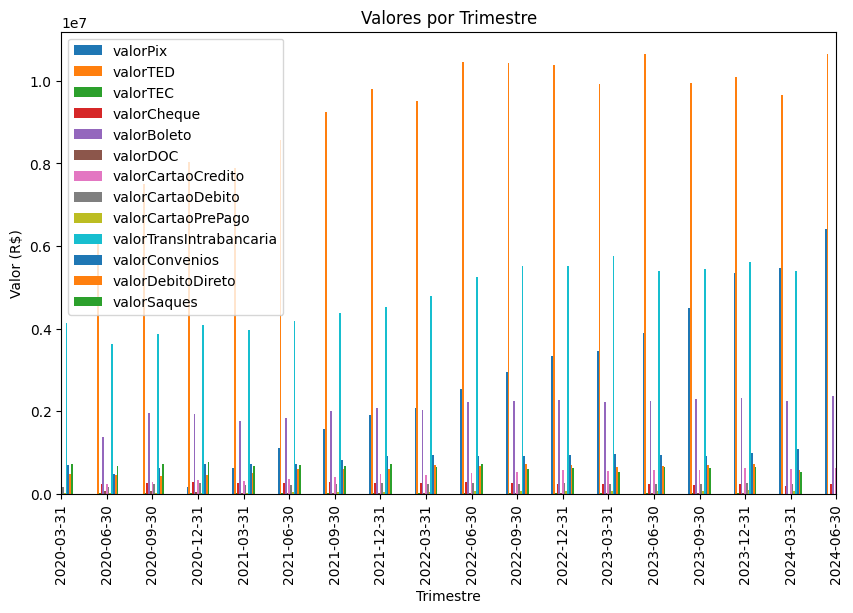

In [ ]:
import matplotlib.pyplot as plt

# Verifique as colunas do DataFrame
print(df.columns)

# Agrupar os dados usando a coluna 'Data' em vez de 'DataReferencia'
df_grouped = df.groupby(['Data'])[['Media', 'Mediana']].sum()

df_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Expectativa de Mercado Anuais')
plt.ylabel('Valor (R$)')
plt.xlabel('Indicador, Data')
plt.xlim([0, len(df_grouped) - 1])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Index(['Indicador', 'Data', 'Reuniao', 'Media', 'Mediana', 'DesvioPadrao',
       'Minimo', 'Maximo', 'numeroRespondentes', 'baseCalculo'],
      dtype='object')


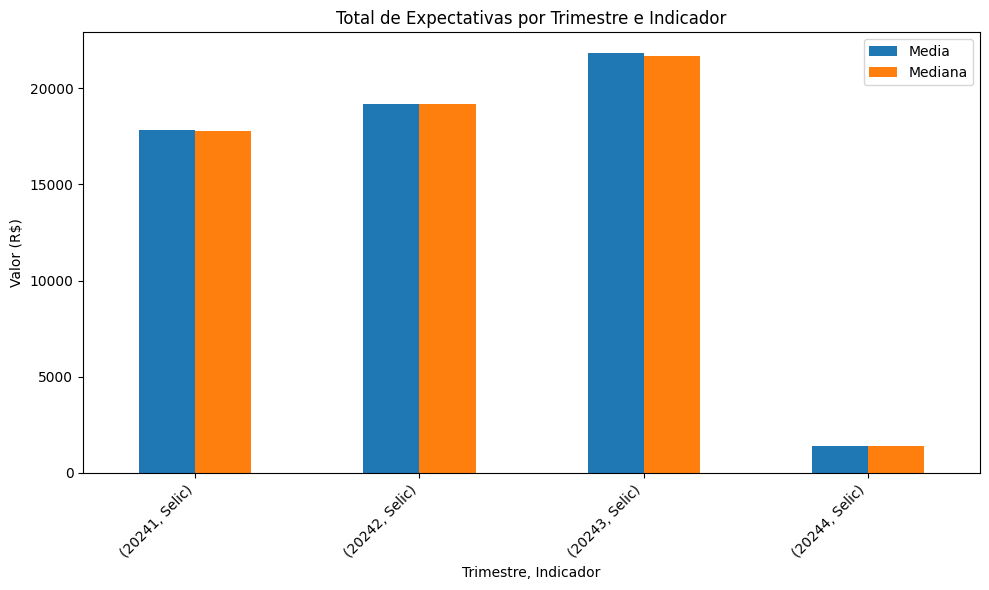

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que df já esteja carregado

# Verifique as colunas do DataFrame
print(df.columns)

# Converter a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'])

# Criar a coluna 'trimestre' (Ajuste o formato conforme necessário)
df['trimestre'] = df['Data'].dt.to_period('Q').astype(str).str.replace('Q', '').astype(int)

# Filtrando dados para o último ano (20240)
df_last_year = df[df['trimestre'] >= 20240]

# Agrupando os dados (substitua 'Indicador' e 'Media' conforme apropriado)
df_last_year_grouped = df_last_year.groupby(['trimestre', 'Indicador'])[['Media', 'Mediana']].sum()

# Criar o gráfico
df_last_year_grouped.plot(kind='bar', figsize=(10, 6))

plt.title('Total de Expectativas por Trimestre e Indicador')
plt.ylabel('Valor (R$)')
plt.xlabel('Trimestre, Indicador')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
